# Limpeza, Manipulacao e Visualizacao

## Baixando e Explorando Dataset

In [8]:
import pandas as pd

url = "https://raw.githubusercontent.com/turicas/rows/refs/heads/develop/examples/data/brazilian-cities.csv"

#carrega csv para um dataframe
cidades = pd.read_csv(url)

#visualiza as primeiras linhas
cidades.head()

,state,city,inhabitants,area
0,AC,Acrelândia,12538,1807.92
1,AC,Assis Brasil,6072,4974.18
2,AC,Brasiléia,21398,3916.50
3,AC,Bujari,8471,3034.87
4,AC,Capixaba,8798,1702.58


In [9]:
#numero de linhas da tabela
len(cidades)

5565

## Limpando e Manipulando Dados

### Ajustes Iniciais

**_erros_='coerce'** faz com que valores não convertíveis sejam trocados por **NaN**

In [12]:
#Converter colunas para numericas, ignorando possíveis erros de formatacao
cidades['inhabitants'] = pd.to_numeric(cidades['inhabitants'], errors='coerce')
cidades['area'] = pd.to_numeric(cidades['area'], errors='coerce')

cidades.head()

,state,city,inhabitants,area
0,AC,Acrelândia,12538,1807.92
1,AC,Assis Brasil,6072,4974.18
2,AC,Brasiléia,21398,3916.50
3,AC,Bujari,8471,3034.87
4,AC,Capixaba,8798,1702.58


### Criando coluna de densidade populacional

In [15]:
cidades['densidade'] = cidades['inhabitants']/cidades['area']

cidades.head()

,state,city,inhabitants,area,densidade
0,AC,Acrelândia,12538,1807.92,6.935041
1,AC,Assis Brasil,6072,4974.18,1.220704
2,AC,Brasiléia,21398,3916.50,5.463552
3,AC,Bujari,8471,3034.87,2.791223
4,AC,Capixaba,8798,1702.58,5.167452


### Filtragem por critério simples

In [22]:
#filtrar cidades do estado de SP
cidades_sp = cidades[cidades['state']=='SP']

#filtrar cidades com mais de 500 mil habitantes
cidades_grandes = cidades[cidades['inhabitants'] >= 500_000]

cidades_sp.head()

,state,city,inhabitants,area,densidade
4706,SP,Adamantina,33797,411.39,82.153188
4707,SP,Adolfo,3557,211.08,16.851431
4708,SP,Aguaí,32148,474.74,67.717066
4709,SP,Águas da Prata,7584,142.96,53.049804
4710,SP,Águas de Lindóia,17266,60.13,287.144520


### Filtrando por query

In [31]:
#cidades de SP com mais de 300mil habitantes
cidades_sp_query = cidades.query("state == 'SP' and inhabitants >= 300_000")

#cidades de MG com densidade maior que 1000 habitantes/km^2
mg_densas = cidades.query("state=='MG' and densidade>=1000")
mg_densas

,state,city,inhabitants,area,densidade
1629,MG,Belo Horizonte,2375151,331.40,7167.021726
1635,MG,Betim,378089,342.85,1102.782558
1769,MG,Contagem,603442,195.27,3090.295488
1901,MG,Ibirité,158954,72.57,2190.354141
1920,MG,Ipatinga,239468,164.88,1452.377487
2200,MG,Ribeirão das Neves,296317,155.54,1905.085509
2231,MG,Santa Cruz de Minas,7865,3.57,2203.081232
2407,MG,Vespasiano,104527,71.22,1467.663578


## Visualizacao de Dados

### Top 10 cidades mais populosas

C:\Users\ayron\AppData\Local\Temp\ipykernel_19688\2347139711.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ayron\AppData\Local\Temp\ipykernel_19688\2347139711.py:8: UserWarning: 
The palette list has fewer values (3) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


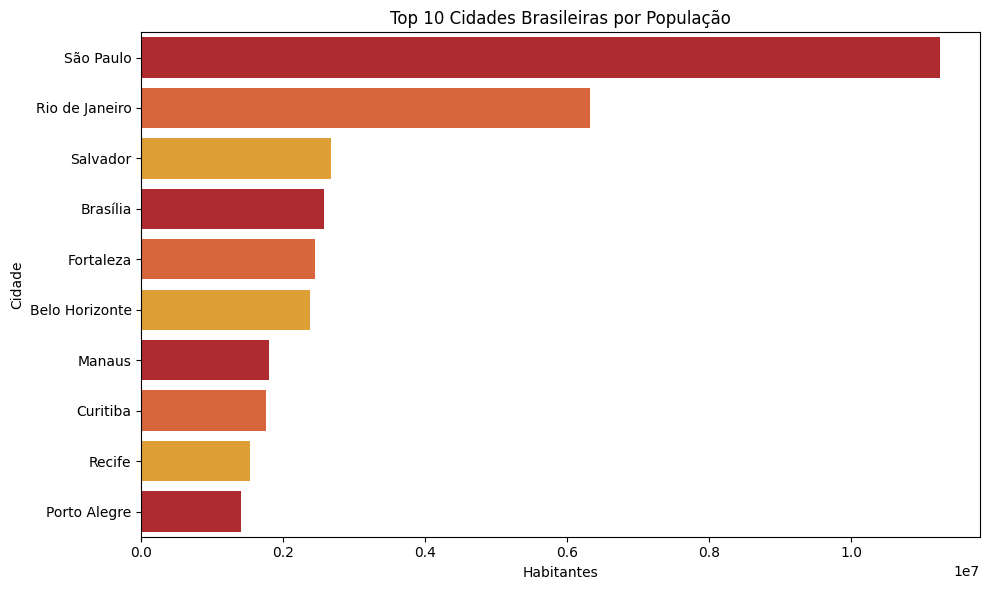

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

#selecionar as 10 cidades mais populosas
top10 = cidades.nlargest(10, 'inhabitants')

plt.figure(figsize=(10,6))
sns.barplot(
    data=top10,
    x='inhabitants',
    y='city',
    palette=["#C4161C", "#F15A22", "#FAA61A"]
)
plt.title('Top 10 Cidades Brasileiras por População')
plt.xlabel('Habitantes')
plt.ylabel('Cidade')
plt.tight_layout()
plt.show()

### Relação entre Área e Populacao

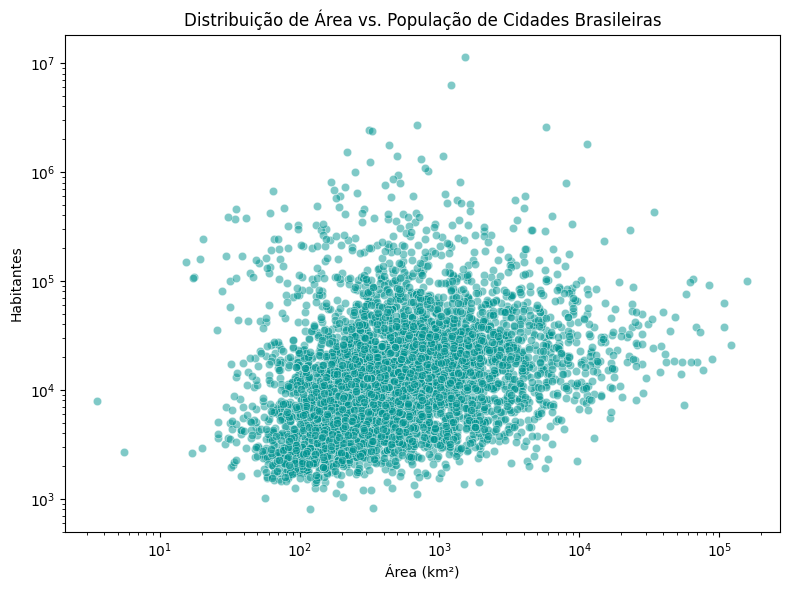

In [34]:
#grafico de dispersao da area versus populacao
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=cidades,
    x='area',
    y='inhabitants',
    alpha=0.5,
    color='#009491'
)
plt.title('Distribuição de Área vs. População de Cidades Brasileiras')
plt.xlabel('Área (km²)')
plt.ylabel('Habitantes')
plt.xscale('log')  # escala logarítmica para melhor visualização
plt.yscale('log')
plt.tight_layout()
plt.show()